<a href="https://colab.research.google.com/github/trivedisunita/MLLearning/blob/main/StockPricePredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1---Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler

#Upload Dataset

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Stock_Price_data_set_csv.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


#Data Exploration

In [3]:
#Information about Dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
#statistical description about dataset
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [5]:
#to check row and columns in dataset
data.shape



(1009, 7)

In [6]:
#To check any missing value in dataset
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no missing value in our dataset

In [7]:
#drop the date column and adj column as these are not much useful for the now
data = data.drop(['Date', 'Adj Close'], axis=1)
data.head()

,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900


#Data Visualization

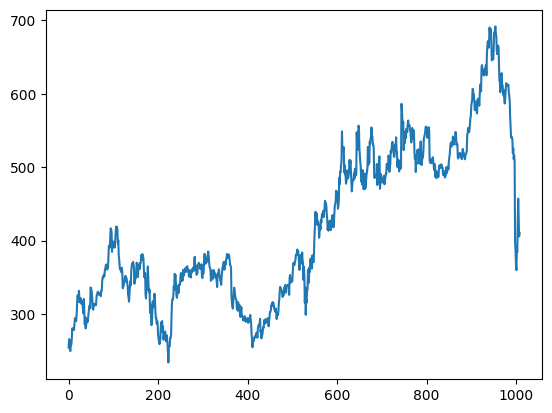

In [8]:
#visualize thecloseing price
plt.plot(data.Close)

In [9]:
data


,Open,High,Low,Close,Volume
0,262.000000,267.899994,250.029999,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,9905200


In [10]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    600.807798
1005    599.403698
1006    597.711299
1007    595.874399
1008    594.198499
Name: Close, Length: 1009, dtype: float64

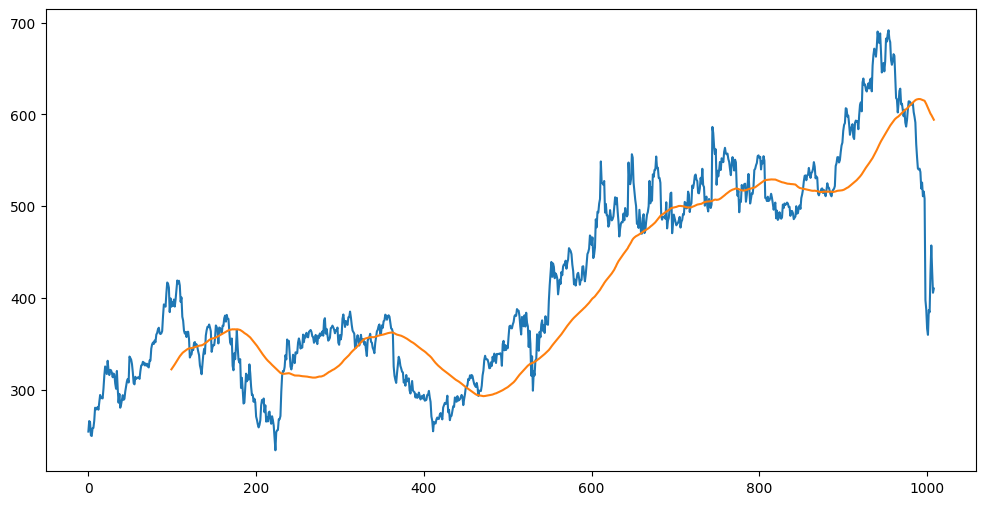

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100)

In [12]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    560.237698
1005    559.751148
1006    559.150698
1007    558.634198
1008    558.141148
Name: Close, Length: 1009, dtype: float64

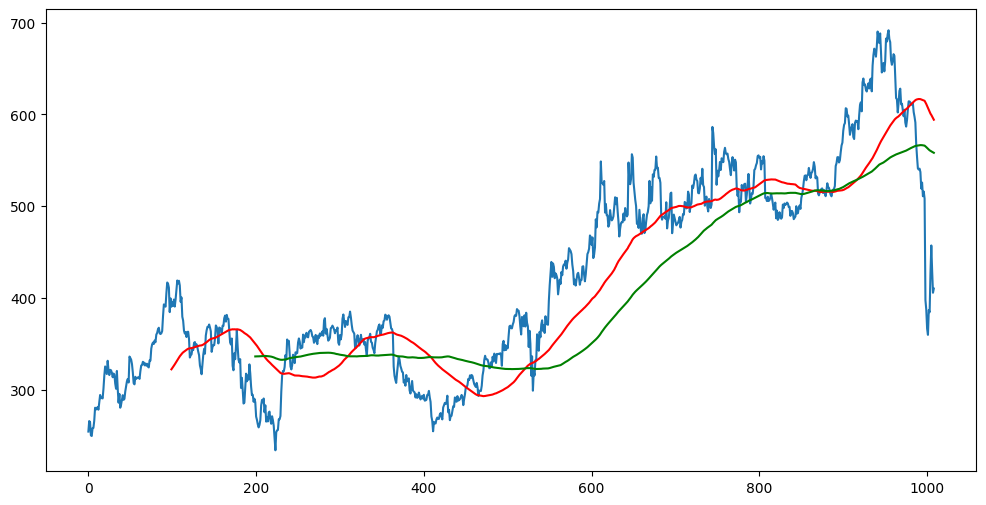

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, color ='r')
plt.plot(ma200, color='g')

#Data Preprocessing

In [14]:
#spliting data into training and testing
#we are predicting price here only close column so we will take close column only
data_training = pd.DataFrame(data['Close'][0: int(len(data)*0.80)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.80): int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(807, 1)
(202, 1)


In [15]:
data_training.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [16]:
data_testing.head()

,Close
807,508.899994
808,508.779999
809,505.549988
810,510.299988
811,505.549988


In [17]:
#to Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05782213],
       [0.09033648],
       [0.08704531],
       [0.04601941],
       [0.04423196],
       [0.06829145],
       [0.06919929],
       [0.09113089],
       [0.13161772],
       [0.12665262],
       [0.12673773],
       [0.13380242],
       [0.12557455],
       [0.14767629],
       [0.17102649],
       [0.16095437],
       [0.16313907],
       [0.16033027],
       [0.19057476],
       [0.23015375],
       [0.25914995],
       [0.24763092],
       [0.23582815],
       [0.27679734],
       [0.24802808],
       [0.2326505 ],
       [0.24873738],
       [0.24743229],
       [0.23994213],
       [0.22584123],
       [0.23724675],
       [0.23435284],
       [0.20660501],
       [0.1902627 ],
       [0.24533279],
       [0.1895534 ],
       [0.14722233],
       [0.17440276],
       [0.13167452],
       [0.14126427],
       [0.15621629],
       [0.17048741],
       [0.15596095],
       [0.15902509],
       [0.18211995],
       [0.19800829],
       [0.21383984],
       [0.220

In [18]:
data_training_array.shape

(807, 1)

In [19]:
#we predict our close column by taking previous 100 days price trend
x_train =[]
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [20]:
#By using Random Forest classifier ML model
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier()


In [21]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))



model.add(Dense(units =1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs =50 )

Epoch 1/50
23/23 [==============================] - 28s 669ms/step - loss: 0.1067
Epoch 2/50
23/23 [==============================] - 9s 400ms/step - loss: 0.0227
Epoch 3/50
23/23 [==============================] - 11s 491ms/step - loss: 0.0202
Epoch 4/50
23/23 [==============================] - 10s 438ms/step - loss: 0.0166
Epoch 5/50
23/23 [==============================] - 10s 450ms/step - loss: 0.0128
Epoch 6/50
23/23 [==============================] - 8s 350ms/step - loss: 0.0131
Epoch 7/50
23/23 [==============================] - 9s 407ms/step - loss: 0.0130
Epoch 8/50
23/23 [==============================] - 10s 462ms/step - loss: 0.0150
Epoch 9/50
23/23 [==============================] - 16s 696ms/step - loss: 0.0138
Epoch 10/50
23/23 [==============================] - 10s 415ms/step - loss: 0.0128
Epoch 11/50
23/23 [==============================] - 11s 447ms/step - loss: 0.0136
Epoch 12/50
23/23 [==============================] - 13s 557ms/step - loss: 0.0140
Epoch 13/50
23/2

In [24]:
past_100_days = data_training
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

<ipython-input-24-7f943dcf7d24>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [25]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [26]:
input_data.shape

(1009, 1)

In [27]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(909, 100, 1)
(909,)


In [28]:
#makink prediction
y_pred = model.predict(x_test)

29/29 [==============================] - 3s 90ms/step


In [29]:
y_pred.shape

(909, 1)

In [30]:
y_pred

array([[0.38753194],
       [0.38982162],
       [0.38934144],
       [0.38629586],
       [0.38108605],
       [0.37446988],
       [0.36753166],
       [0.36152887],
       [0.3573243 ],
       [0.35538554],
       [0.35560244],
       [0.3570158 ],
       [0.35869598],
       [0.35936922],
       [0.35804766],
       [0.35405332],
       [0.34730223],
       [0.33832526],
       [0.32785755],
       [0.3168134 ],
       [0.3060733 ],
       [0.2958774 ],
       [0.28583974],
       [0.27566493],
       [0.26510945],
       [0.25432616],
       [0.24360305],
       [0.23341832],
       [0.22451961],
       [0.2173324 ],
       [0.21216877],
       [0.20910314],
       [0.2078365 ],
       [0.20778391],
       [0.20797864],
       [0.20744231],
       [0.20537782],
       [0.20157963],
       [0.19655256],
       [0.191066  ],
       [0.18584372],
       [0.18179551],
       [0.17999661],
       [0.18159948],
       [0.18789127],
       [0.19935057],
       [0.21509361],
       [0.233

In [31]:
y_test

array([0.35285382, 0.34413837, 0.35888248, 0.34215064, 0.35934124,
       0.38087852, 0.40429435, 0.39699876, 0.40359536, 0.39234616,
       0.35368381, 0.36390644, 0.31803588, 0.30853411, 0.28472512,
       0.27777896, 0.28129573, 0.26963151, 0.28175442, 0.28223497,
       0.26502258, 0.22079026, 0.22622924, 0.22826063, 0.24162861,
       0.23854872, 0.25565193, 0.25763959, 0.24842179, 0.25224434,
       0.24462111, 0.23466065, 0.22631656, 0.20209255, 0.19344269,
       0.18107948, 0.20499772, 0.22747425, 0.24149756, 0.22998626,
       0.27290798, 0.28548958, 0.29403024, 0.29304734, 0.29946923,
       0.29226096, 0.28334899, 0.23437668, 0.24590985, 0.25075902,
       0.25016928, 0.26659529, 0.29721939, 0.29328759, 0.28544591,
       0.25440685, 0.29219543, 0.29068825, 0.28719334, 0.27808479,
       0.29647666, 0.2960835 , 0.31454097, 0.32072254, 0.3063498 ,
       0.32229525, 0.3129246 , 0.31272795, 0.28345818, 0.25659117,
       0.25167646, 0.26611473, 0.2009786 , 0.19051572, 0.23083

In [32]:
scaler.scale_

array([0.00218431])

In [33]:
scale_factor = 1/ 0.00218431
y_pred = y_pred *scale_factor
y_test = y_test *scale_factor

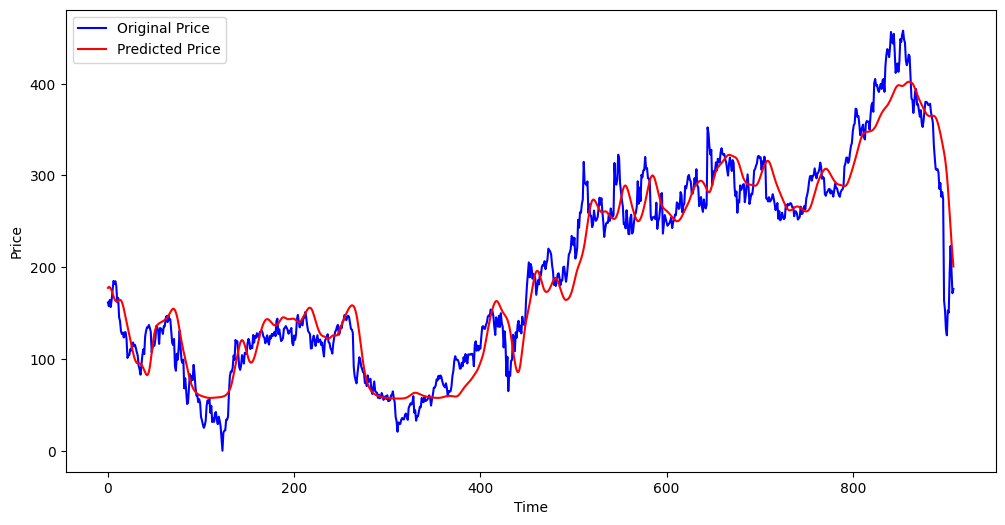

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
#BY USING RANDOM FOREST CLASSIFIER
